# Pengolahan Citra Digital
## Nama : Syifa Apriyani
## NIM : 210401010048
## Kelas : IFD51
## Dosen : Alun Sujjada, S.Kom., M.T

###2. Teknik histogram equalization untuk meningkatkan kontras citra.
#####Pilih citra dengan kontras yang rendah, misalnya citra yang gelap atau kabur.
#####Terapkan teknik histogram equalization untuk meningkatkan kontras citra tersebut.
#####Tampilkan citra asli dan citra yang telah diperbaiki dengan histogram equalization.
##### Tampilkan hasilnya menggunakan matplotlib
##### Gunakan 3 library python yang diperlukan yaitu imageio, numpy, matplotlib

In [1]:
import imageio.v3 as img
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ship = img.imread("ship.jpeg")
gray = np.mean(ship, axis=2).astype(np.uint8)
hist_gray, bins_gray = np.histogram(gray.flatten(), bins = 256, range =[0, 256])

In [10]:
cdf = hist_gray.cumsum()
cdf_normalized = cdf * hist_gray.max() / cdf.max()

In [11]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [12]:
img_equalized = cdf[gray]

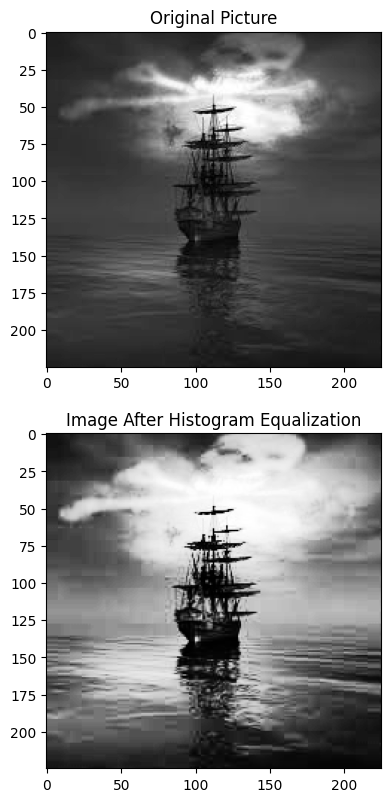

In [18]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1), plt.imshow(gray, cmap='gray')
plt.title('Original Picture')
plt.subplot(4, 1, 2), plt.imshow(img_equalized, cmap='gray')
plt.title('Image After Histogram Equalization')
plt.show()

### 3. Buatlah program contrast menggunakan python dengan level 1.5 kemudian bandingkan hasilnya dengan teknik Histogram Equalization pada nomor 2.

In [24]:
def bright (ship, factor):
  ship = ship.astype(np.float32)
  ship = ship * factor
  ship = np.clip(ship,0,255)
  return ship.astype(np.uint8)

In [29]:
ship = img.imread("ship.jpeg")
newImage = bright(ship,1.5)

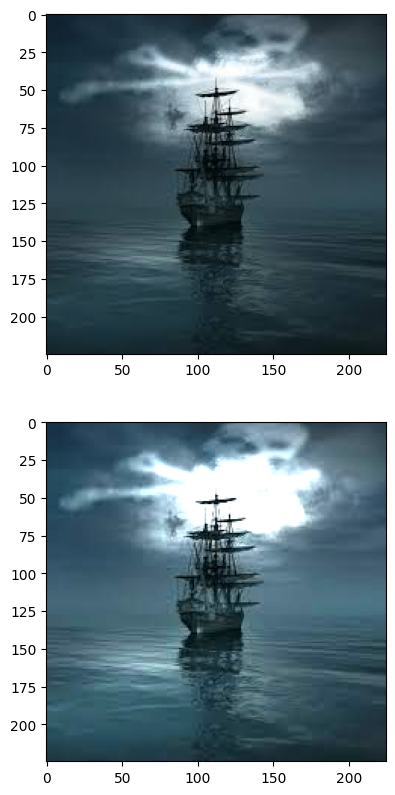

In [32]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.imshow(ship)
plt.subplot(3,1,2)
plt.imshow(newImage)
plt.show()